# Bayesian Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate synthetic data

In [4]:
# Define the number of datapoints per blob
num_blob_1 = 50
num_blob_2 = 50

# Define the mean of the datapoints
muy_1 = [0, 0]
muy_2 = [5, 0]

# Define the covariance matrices
cov = np.array([
    [1, 0],
    [0, 1]
])

# Generate the datapoints
np.random.seed(80)
blob_1 = np.random.multivariate_normal(mean=muy_1, cov=cov, size=num_blob_1)
blob_2 = np.random.multivariate_normal(mean=muy_2, cov=cov, size=num_blob_2)

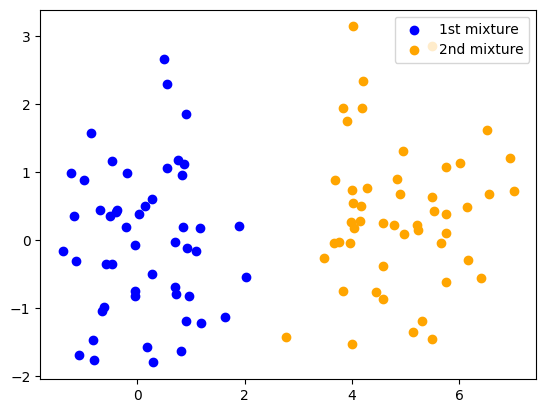

In [5]:
# Display the datapoints
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.legend()
plt.show()

In [34]:
# Add x_0
x_1 = np.hstack((np.ones(blob_1.shape[0]).reshape(-1, 1), blob_1))
x_2 = np.hstack((np.ones(blob_2.shape[0]).reshape(-1, 1), blob_2))

# Merge the dataset
X = np.vstack((x_1, x_2))
t = np.array([1] * num_blob_1 + [0] * num_blob_2)

## Bayesian Logistic Regression implementation

In [93]:
# Define the posterior distribution of w
m_0 = np.zeros(3)
S_0 = np.eye(3) * 5

In [94]:
def calculate_prediction(X, w):
    """
    Calculate y_n
    :param X: the train features
    :param w: the train labels
    :return: the value of the prediction
    """
    z = np.dot(X, w)
    y = 1 / (1 + np.exp(-z))
    return y

def calculate_cost(X, t, m_0, S_0, w):
    """
    Calculate the cost function
    :param X: the train features
    :param t: the train labels
    :param w: the parameters
    :return: the value of the cost function
    """
    y = calculate_prediction(X, w)
    likelihood_cost = - np.sum(t * np.log(y) + (1 - t) * np.log(1 - y))
    posterior_cost = (1 / 2) * np.dot(w - m_0, np.linalg.solve(S_0, w - m_0))
    return likelihood_cost + posterior_cost

def find_posterior_mean(X_train, t_train, S_0, m_0, learning_rate=0.01, epochs=100):
    """
    Find the posterior mean of the approximated posterior distribution (m_N or w_map)
    :param X_train: the train features
    :param t_train: the train labels
    :param S_0: prior covariance
    :param m_0: prior mean
    :return: the posterior mean
    """
    # Initialize w_map
    w_map = np.random.randn(m_0.shape[0])
    
    # Save the costs
    costs = []
    
    # Go through epochs
    for epoch in range(epochs):
        # Calculate the prediction
        y = calculate_prediction(X_train, w_map)
        
        # Calculate the gradient
        d_w_map = np.linalg.solve(S_0, w_map - m_0) - np.dot(X_train.T, y - t)
        
        # Update w_map using the gradient
        w_map = w_map + learning_rate * d_w_map
    
        # Calculate the cost
        cost = calculate_cost(X_train, t_train, m_0, S_0, w_map)
        costs.append(cost)
        print(f"EPOCHS: {epoch} - Cost: {cost}")
        
    return w_map, costs
        
    
def find_posterior_covariance(X_train, m_N, S_0):
    """
    Calculate the covariance matrix of the approximated Gaussian distribution
    :param X_train: the train features
    :param S_0: prior covariance
    :return: the posterior covariance
    """
    # Calculate the prediction
    y = calculate_prediction(X_train, m_N)
    return np.linalg.inv(S_0) + X_train.T @ np.diag(y * (1 - y)) @ X_train


def find_posterior_distribution(X_train, t_train, S_0, m_0, learning_rate=0.01, epochs=100):
    """
    Performance Laplace approximation on the posterior distribution of w
    :param X_train: the train features
    :param t_train: the train labels
    :param S_0: prior covariance
    :param m_0: prior mean
    :param learning_rate: learning rate
    :param epochs: epochs
    :return: the posterior mean and covariance (m_N and S_N)
    """
    m_N, costs = find_posterior_mean(X_train, t_train, S_0, m_0, learning_rate=learning_rate, epochs=epochs)
    S_N = find_posterior_covariance(X_train, m_N, S_0)
    return m_N, S_N, costs

In [98]:
# Find the posterior mean and covariance
m_N, S_N, costs = find_posterior_distribution(X, t, S_0, m_0, learning_rate=0.01, epochs=250)

EPOCHS: 0 - Cost: 65.0592645555637
EPOCHS: 1 - Cost: 54.60396007575131
EPOCHS: 2 - Cost: 46.24099163990021
EPOCHS: 3 - Cost: 39.6674660078794
EPOCHS: 4 - Cost: 34.53696762346202
EPOCHS: 5 - Cost: 30.522158754836322
EPOCHS: 6 - Cost: 27.347753482285018
EPOCHS: 7 - Cost: 24.80049506903192
EPOCHS: 8 - Cost: 22.72303270650953
EPOCHS: 9 - Cost: 21.00165214731932
EPOCHS: 10 - Cost: 19.554360994372413
EPOCHS: 11 - Cost: 18.321549882249112
EPOCHS: 12 - Cost: 17.259293599312013
EPOCHS: 13 - Cost: 16.334715347231004
EPOCHS: 14 - Cost: 15.522811218028187
EPOCHS: 15 - Cost: 14.804268389616727
EPOCHS: 16 - Cost: 14.16395138258565
EPOCHS: 17 - Cost: 13.58983804231648
EPOCHS: 18 - Cost: 13.072260791433116
EPOCHS: 19 - Cost: 12.603357563577951
EPOCHS: 20 - Cost: 12.176668712241609
EPOCHS: 21 - Cost: 11.786836977161098
EPOCHS: 22 - Cost: 11.429381230314728
EPOCHS: 23 - Cost: 11.100523761074985
EPOCHS: 24 - Cost: 10.797056919050918
EPOCHS: 25 - Cost: 10.516239046710268
EPOCHS: 26 - Cost: 10.255712462754

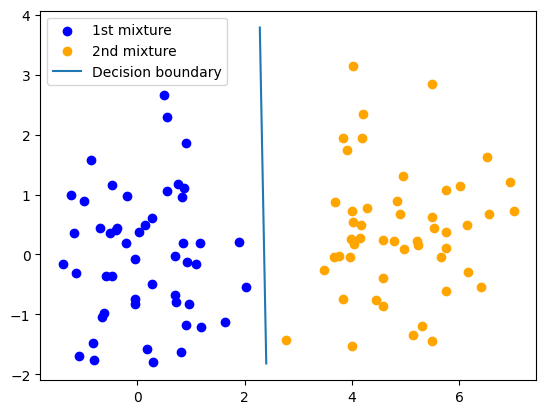

In [111]:
# The w parameters
w_0, w_1, w_2 = m_N[0], m_N[1], m_N[2]

# Calculate starting and ending points
x_1 = 2.28
y_1 = (-w_0 - w_1 * x_1) / w_2
x_2 = 2.4
y_2 = (-w_0 - w_1 * x_2) / w_2

# Draw the boundary
plt.scatter(blob_1[:, 0], blob_1[:, 1], color='blue', label='1st mixture')
plt.scatter(blob_2[:, 0], blob_2[:, 1], color='orange', label='2nd mixture')
plt.plot([x_1, x_2], [y_1, y_2], label='Decision boundary')
plt.legend()
plt.savefig("figures/line.png")
plt.show()

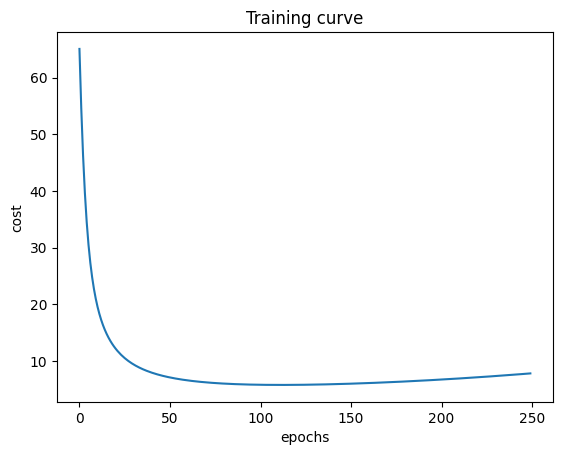

In [112]:
# Draw the costs
plt.plot(np.arange(250), costs)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.title("Training curve")
plt.savefig("figures/train.png")
plt.show()

In [105]:
# Calculate the prediction using the predictive distribution
def predictive_distribution(X_test, m_N, S_N):
    """
    Calculate the prediction using the Bayesian method
    :param X_test: the test features
    :param m_n: posterior mean
    :param S_N: posterior covariance
    :return: p(C_1 | x)
    """
    predictions = []
    
    for x_test in X_test:
        mu_a = np.dot(x_test, m_N)
        sigma_a = np.dot(x_test, np.dot(S_N, x_test))
        val = mu_a / np.sqrt(1 + np.pi * sigma_a / 8)
        predictions.append(1 / (1 + np.exp(-val)))
        
    return np.array(predictions)

In [110]:
# Calculate the prediction
y = predictive_distribution(X, m_N, S_N)
accuracy = np.sum((y >= 0.5) == t) / len(t)
print(f"The accuracy is {accuracy}")

The accuracy is 1.0
